In [1]:
import argparse
import numpy as np
import pandas as pd
import pickle
import copy
import torch
import torchvision
import matplotlib.pyplot as plt
from time import time
from torchvision import datasets,transforms
from torch import optim
import torch.nn as nn
from torch.utils.data import DataLoader, Dataset, TensorDataset
import os
import random
from tqdm import tqdm
import torch.nn.functional as F
from collections import Counter
from itertools import islice
import itertools

In [2]:
with open('rounds_0.9', 'rb') as f:
    rounds = pickle.load(f)

In [3]:
marker = itertools.cycle(('o', 'v', '^', 's', '8', '<', '>','p'))
#marker = itertools.cycle(('o', 'v', '^', '>','p'))
from matplotlib.lines import Line2D

In [4]:
with open('acc_attack_0.9', 'rb') as f:
    acc_attack = pickle.load(f)

In [5]:
with open('acc_defense_0.9', 'rb') as f:
    acc_defense = pickle.load(f)

In [6]:
with open('asr_attack_0.9', 'rb') as f:
    asr_attack = pickle.load(f)

In [7]:
with open('asr_defense_0.9', 'rb') as f:
    asr_defense = pickle.load(f)

In [8]:
with open('t_mcr_attack_0.9', 'rb') as f:
    tmcr_attack = pickle.load(f)

In [9]:
with open('t_mcr_defense_0.9', 'rb') as f:
    tmcr_defense = pickle.load(f)

In [10]:
alpha = [0.9]

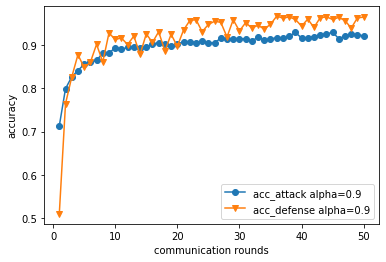

In [11]:
for i in range(len(acc_attack)):
    plt.plot(rounds[0],acc_attack[i],marker=next(marker),label='acc_attack alpha={}'.format(alpha[i]))
    plt.plot(rounds[0],acc_defense[i],marker=next(marker),label='acc_defense alpha={}'.format(alpha[i]))
plt.xlabel('communication rounds')
plt.ylabel('accuracy')
plt.legend()

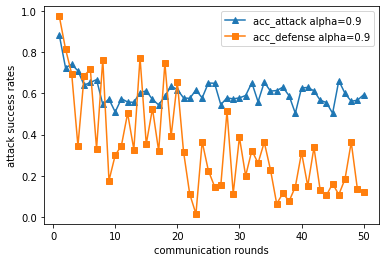

In [12]:
for i in range(len(acc_attack)):
    plt.plot(rounds[0],asr_attack[i],marker=next(marker),label='acc_attack alpha={}'.format(alpha[i]))
    plt.plot(rounds[0],asr_defense[i],marker=next(marker),label='acc_defense alpha={}'.format(alpha[i]))
plt.xlabel('communication rounds')
plt.ylabel('attack success rates')
plt.legend()

# Plot accuracy all % attackers

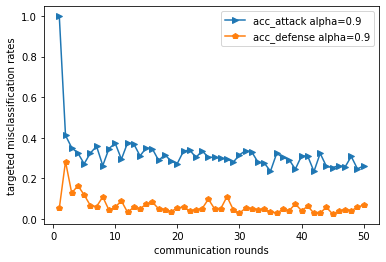

In [20]:
for i in range(len(acc_attack)):
    plt.plot(rounds[0],tmcr_attack[i],marker=next(marker),label='acc_attack alpha={}'.format(alpha[i]))
    plt.plot(rounds[0],tmcr_defense[i],marker=next(marker),label='acc_defense alpha={}'.format(alpha[i]))
plt.xlabel('communication rounds')
plt.ylabel('targeted misclassification rates')
plt.legend()

# Plot attack success rate

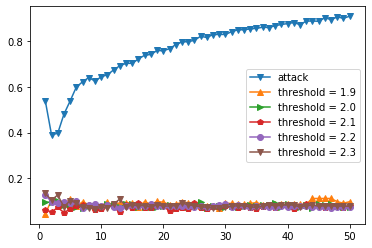

In [22]:
plt.plot(rounds[0],asr[0],label='attack',marker=next(marker))
for i in range(1,len(rounds)):
    plt.plot(rounds[i],asr[i],marker=next(marker),label='threshold = {:.1f}'.format(1.8 + i*0.1))
plt.legend()

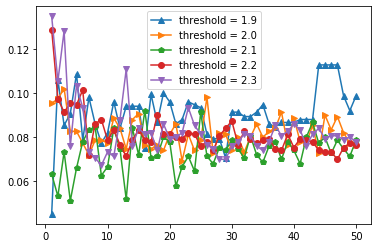

In [23]:
#plt.plot(rounds[0],asr[0],label='attack',marker=next(marker))
for i in range(1,len(rounds)):
    plt.plot(rounds[i],asr[i],marker=next(marker),label='threshold = {:.1f}'.format(i*0.1+1.8))
plt.legend()

# Plot misclassification rate

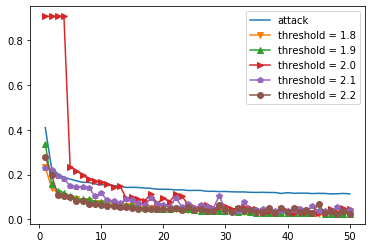

In [22]:
plt.plot(rounds[0],mcr[0],label='attack')
for i in range(1,len(rounds)):
    plt.plot(rounds[i],mcr[i],marker=next(marker),label='threshold = {}'.format(i*0.1+1.7))
plt.legend()

# Plot targeted misclassification rate

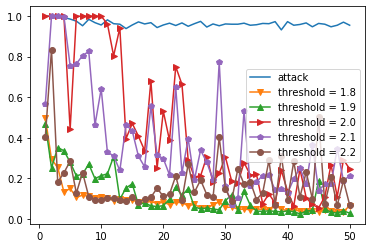

In [23]:
plt.plot(rounds[0],t_mcr[0],label='attack')
for i in range(1,len(rounds)):
    plt.plot(rounds[i],t_mcr[i],marker=next(marker),label='threshold = {}'.format(i*0.1+1.7))
plt.legend()

# Rounds 20-50 without marker